# Базовая модель

In [1]:
import mesa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from warnings import filterwarnings
from tqdm import tqdm

sys.path.insert(0, "../") # Для импорта custom_module

from custom_module.market_and_cycle_model.agents import Buyer, Seller, House, Government
from custom_module.market_and_cycle_model.world import WorldModel

filterwarnings("ignore")

# Simulation

In [2]:
model = WorldModel(num_buyers=10000)
model.mortgage_rate = 0.1
model.youth_mortgage_rate = model.mortgage_rate
model.family_mortgage_rate = model.mortgage_rate
for month in tqdm(range(240)):
    if month == 192:
        model.agents_by_type[Government][0].taxes = 0
        model.agents_by_type[Government][0].redistribution_mode = True
    model.step()

100%|██████████| 240/240 [01:48<00:00,  2.22it/s]


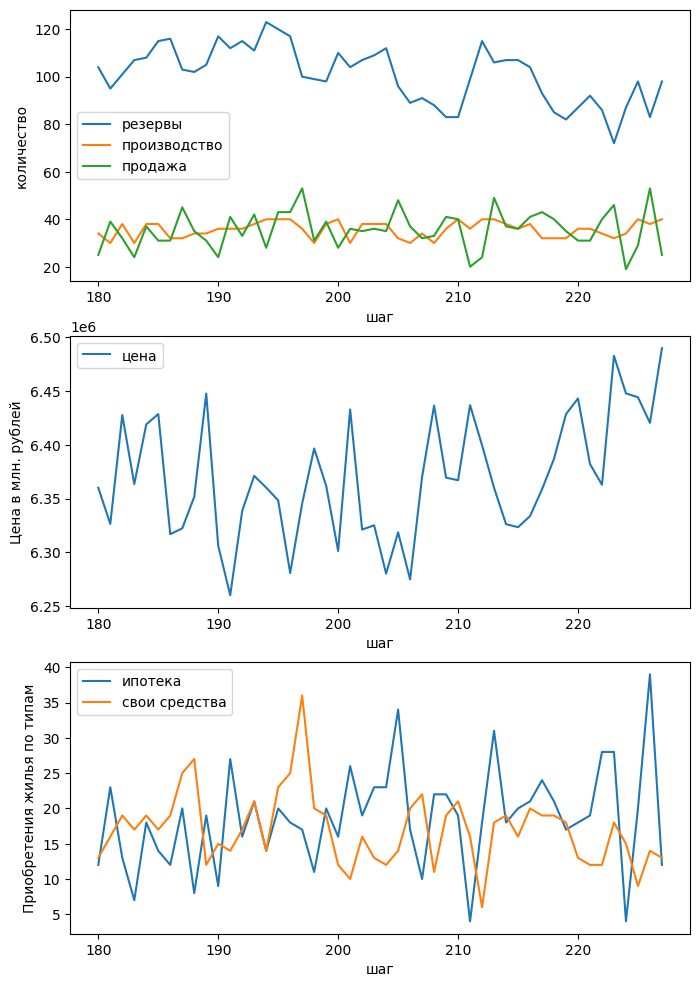

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,12))

ax1.plot(model.datacollector.get_model_vars_dataframe()[['alt_reserve', 'produce', 'sold']][180:228])
ax1.legend(['резервы', 'производство', 'продажа'])
ax1.set_ylabel('количество')
ax1.set_xlabel('шаг')

ax2.plot(model.datacollector.get_model_vars_dataframe()[['sold_price']][180:228])
ax2.legend(['цена'])
ax2.set_ylabel('Цена в млн. рублей')
ax2.set_xlabel('шаг')


ax3.plot(model.datacollector.get_model_vars_dataframe()[['cash_bought', 'mortgages_bought']][180:228])
ax3.legend(['ипотека', 'свои средства'])
ax3.set_ylabel('Приобретения жилья по типам')
ax3.set_xlabel('шаг');


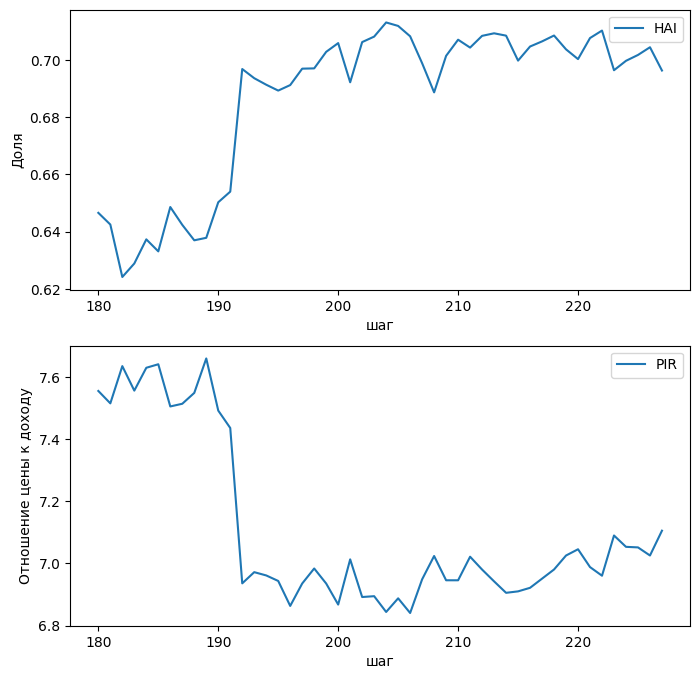

In [4]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))

ax1.plot(model.datacollector.get_model_vars_dataframe()[['hai']][180:228])
ax1.legend(['HAI'])
ax1.set_ylabel('Доля')
ax1.set_xlabel('шаг')

ax2.plot(model.datacollector.get_model_vars_dataframe()[['pir']][180:228])
ax2.legend(['PIR'])
ax2.set_ylabel('Отношение цены к доходу')
ax2.set_xlabel('шаг');


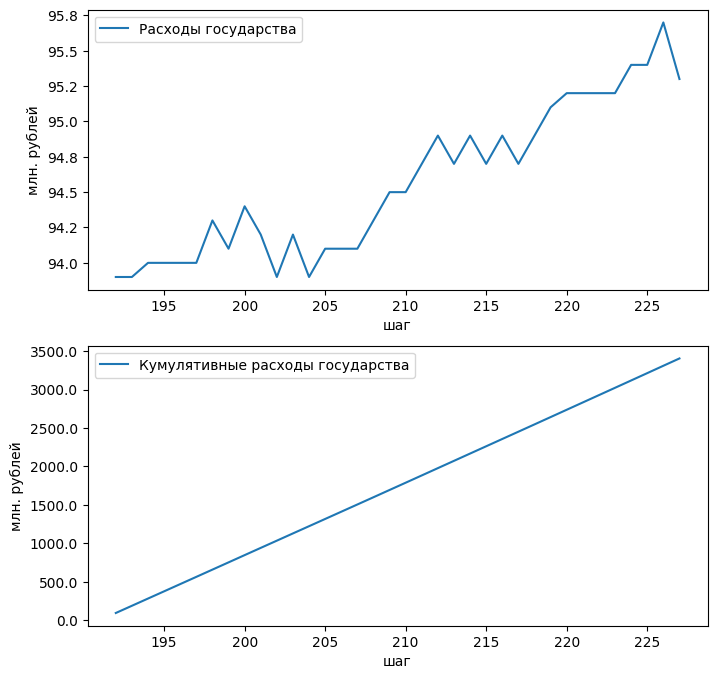

In [17]:
def million_formater(x, pos):
    return str(round(x / 1e6, 1))

fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))

ax1.plot(model.datacollector.get_model_vars_dataframe()[['transferts']][192:228])
ax1.legend(['Расходы государства'])
ax1.yaxis.set_major_formatter(million_formater)
ax1.set_ylabel('млн. рублей')
ax1.set_xlabel('шаг');


ax2.plot(model.datacollector.get_model_vars_dataframe()[['transferts']][192:228].cumsum())
ax2.legend(['Кумулятивные расходы государства'])
ax2.yaxis.set_major_formatter(million_formater)
ax2.set_ylabel('млн. рублей')
ax2.set_xlabel('шаг');